In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [23]:
dataset = pd.read_csv('abalone.csv')
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].T

x = pd.get_dummies(x, drop_first=False, prefix_sep='_')       #one hot encoding
x = (x - np.min(x)) / (np.max(x) - np.min(x))       #normalizing the data
x.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0


## Regularization parameter L1 using lasso and gridSearchCV

In [25]:
def get_L1_lasso_gridsearch(x, y):
    lasso = Lasso(normalize=True)
    param = {'alpha' : np.linspace(0.1, 1, 50)}
    gscv = GridSearchCV(lasso, param_grid = param, cv = 5)
    gscv.fit(x, y)
    return gscv.best_params_

optimal_L1_param = get_L1_lasso_gridsearch(x, y)['alpha']
print('L1 regularization parameter: ', optimal_L1_param)

L1 regularization parameter:  0.1


## Regularization parameter L2 using ridge and gridSearchCV

In [26]:
def get_L2_ridge_gridsearch(x, y):
    ridge = Ridge(normalize = True)
    param = {'alpha' : np.linspace(0, 1, 50)}
    gscv = GridSearchCV(ridge, param_grid = param, cv = 5)
    gscv.fit(x, y)
    return gscv.best_params_

optimal_L2_param = get_L2_ridge_gridsearch(x, y)['alpha']
print('L2 regularization parameter: ', optimal_L2_param)


L2 regularization parameter:  0.0


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

x_train  = np.c_[np.ones(len(x_train)),x_train]
x_test  = np.c_[np.ones(len(x_test)),x_test]

## Gradient descent with L1 regularization

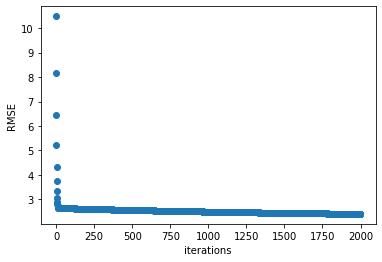

In [28]:
def compute_rmse(X, y, theta):
    m = len(X)
    h = X @ theta
    return np.sqrt(np.sum((h - y) ** 2) / m)

def gradient_descent_L1(x, y, l1_param, epochs, alpha = 0.1):
    m = len(x)  
    n = len(x[0])
    theta = np.zeros(n).T
    rmse = []
    
    for i in range(epochs):
        h = x @ theta
        grad = (((((h - y).T) @ x).T) + ((l1_param/2) * np.sign(theta))) / m
        theta = theta - alpha * grad
        rmse.append(np.sqrt(np.sum((h - y) ** 2) / m))
    return theta, rmse

theta, rmse = gradient_descent_L1(x_train, y_train, optimal_L1_param, 2000, 0.1)
rmse_gd_train = rmse[-1]
rmse_gd_test = compute_rmse(x_test, y_test, theta)
plt.plot(range(2000), rmse,'o')
plt.xlabel('iterations')
plt.ylabel('RMSE')
plt.show()

## Gradient descent with L2 regularization


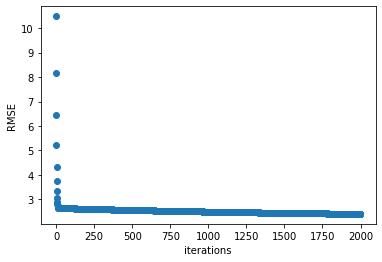

In [29]:

def gradient_descent_L2(X, y, l2_param, epochs, alpha):
    m = len(x)  
    n = len(x[0]) 
    theta = np.zeros(n).T
    rmse = []
    
    for i in range(epochs):
        h = x @ theta
        grad = (((((h - y).T) @ x).T) + (l2_param * theta)) / m
        theta = theta - alpha * grad
        rmse.append(np.sqrt(np.sum((h - y) ** 2) / m))
        
    return theta, rmse

theta, rmse = gradient_descent_L1(x_train, y_train, optimal_L1_param, 2000, 0.1)
rmse_gd_train = rmse[-1]
rmse_gd_test = compute_rmse(x_test, y_test, theta)
plt.plot(range(2000), rmse,'o')
plt.xlabel('iterations')
plt.ylabel('RMSE')
plt.show()